### Deliverable 1: Preprocessing the Data for a Neural Network

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [23]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df=application_df.drop(["EIN","NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Determine the number of unique values in each column.

#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [25]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<Axes: >

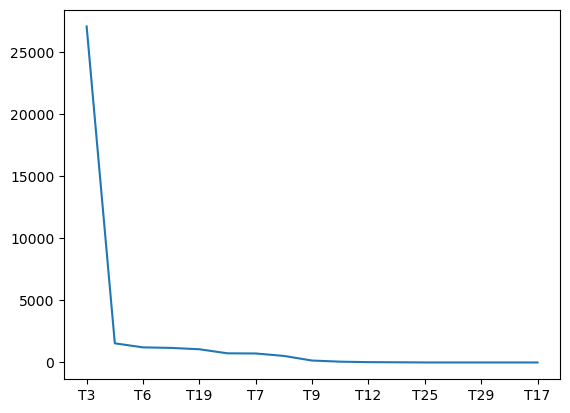

In [26]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_df["APPLICATION_TYPE"].value_counts().plot()

In [27]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
s= application_df["APPLICATION_TYPE"].value_counts()
replace_application=[i[1] for i in list(zip(s,s.index)) if i[0]<500]

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [28]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: >

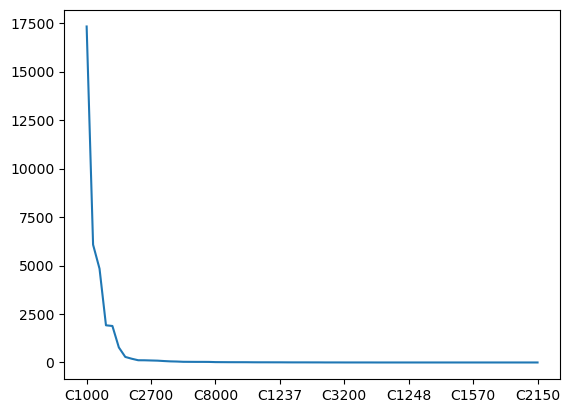

In [29]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts().plot()

In [30]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
s= application_df["CLASSIFICATION"].value_counts()
replace_class=[i[1] for i in list(zip(s,s.index)) if i[0]<1800]
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [31]:
# Generate our categor

#  YOUR CODE GOES HERE
categor_columns=list(application_df.select_dtypes(['object']).columns)
categor_columns

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df=enc.fit_transform(application_df[categor_columns])
encode_df=pd.DataFrame(encode_df)
# Add the encoded variable names to the dataframe
encode_df.columns =enc.get_feature_names_out(categor_columns)
encode_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
merge_df = pd.concat([application_df, encode_df], axis=1)
merge_df=merge_df.drop(categor_columns,axis=1)
merge_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
features=merge_df.drop("IS_SUCCESSFUL",axis=1)
features
target=merge_df["IS_SUCCESSFUL"]
target
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.1)

In [35]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=len(X_train_scaled[0])))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                3520      
                                                                 
 dense_9 (Dense)             (None, 30)                2430      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
# Train the model
#  YOUR CODE GOES HERE
mc = tf.keras.callbacks.ModelCheckpoint('model3_weight{epoch:08d}.h5', 
                                     save_weights_only=True,period=5)
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[mc])
nn.save("AlphabetSoupCharity_Optimization.h5")

Epoch 1/50
965/965 [==============================] - 1s 879us/step - loss: 0.5703 - accuracy: 0.7202
Epoch 2/50
965/965 [==============================] - 1s 889us/step - loss: 0.5567 - accuracy: 0.7280
Epoch 3/50
965/965 [==============================] - 1s 968us/step - loss: 0.5540 - accuracy: 0.7304
Epoch 4/50
965/965 [==============================] - 1s 897us/step - loss: 0.5518 - accuracy: 0.7303
Epoch 5/50
965/965 [==============================] - 1s 981us/step - loss: 0.5506 - accuracy: 0.7303
Epoch 6/50
965/965 [==============================] - 1s 915us/step - loss: 0.5493 - accuracy: 0.7318
Epoch 7/50
965/965 [==============================] - 1s 991us/step - loss: 0.5484 - accuracy: 0.7324
Epoch 8/50
965/965 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7324
Epoch 9/50
965/965 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7326
Epoch 10/50
965/965 [==============================] - 1s 1ms/step - loss: 0.5477 - ac

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 0s - loss: 0.5488 - accuracy: 0.7367 - 126ms/epoch - 1ms/step
Loss: 0.5487849116325378, Accuracy: 0.7367346882820129


In [40]:


nn = tf.keras.models.Sequential()


nn.add(tf.keras.layers.Dense(units=300, activation="relu", input_dim=len(X_train_scaled[0])))

nn.add(tf.keras.layers.Dense(units=200, activation="relu"))
nn.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn.summary()
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 300)               13200     
                                                                 
 dense_12 (Dense)            (None, 200)               60200     
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 98,601
Trainable params: 98,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
965/965 [=============================

965/965 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7385
Epoch 71/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5370 - accuracy: 0.7381
Epoch 72/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7379
Epoch 73/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7393
Epoch 74/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7389
Epoch 75/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7385
Epoch 76/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7384
Epoch 77/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7388
Epoch 78/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7391
Epoch 79/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 

Epoch 150/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7396
Epoch 151/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7400
Epoch 152/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 0.7397
Epoch 153/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7394
Epoch 154/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7400
Epoch 155/200
965/965 [==============================] - 3s 4ms/step - loss: 0.5347 - accuracy: 0.7394
Epoch 156/200
965/965 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7393
Epoch 157/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7394
Epoch 158/200
965/965 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7400
Epoch 159/200
965/965 [==============================] - 2s 2ms/step - lo

In [41]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

108/108 - 0s - loss: 0.6550 - accuracy: 0.7341 - 101ms/epoch - 938us/step
Loss: 0.6549915671348572, Accuracy: 0.7341107726097107
